In [1]:
# Load thư viện
import pandas as pd
import numpy as np
import pyodbc
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')  #đẹp hơn
#Lấy tất cả column trên tập dataset
pd.set_option('display.max_columns', 200)

In [2]:

# Kết nối với SQL Server bằng Windows Authentication
server = 'PS1BICCAPP01'
database = 'SERVICE'
cnxn = pyodbc.connect(f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={server};DATABASE={database};Trusted_Connection=yes;")

query = "select * from ##atm_offsite_tinh_lon;"

df = pd.read_sql(query, cnxn)

C:\Users\quynhntt17\AppData\Local\Temp\ipykernel_47400\2741513301.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnxn)


In [3]:
#máy ATM ở Hà Nội và Hồ Chí Minh 
df

,ID,AMND_DATE,AMND_OFFICER,AUTH_CODE,IS_AUTHORIZATION,OUTWARD_STATUS,POSTING_DATE,POSTING_STATUS,REQUEST_CATEGORY,RETURN_CODE,RET_REF_NUMBER,SERVICE_CLASS,SETTL_AMOUNT,SETTL_CURR,SIC_CODE,SIC_NAME,SOURCE_CHANNEL,SOURCE_CODE,SOURCE_ID,SOURCE_MEMBER_ID,SOURCE_NUMBER,SOURCE_REG_NUM,TARGET_CHANNEL,TARGET_FEE_AMOUNT,TARGET_FEE_CURR,TARGET_ID,TARGET_MEMBER_ID,TARGET_NUMBER,TRANS_AMOUNT,TRANS_CITY,TRANS_CONDITION,TRANS_COUNTRY,TRANS_CURR,TRANS_DATE,TRANS_DETAILS,TRANS_TYPE,MERCHANT_ID,CREATE_DATE,UPDATE_DATE,TRANS_TYPE_DETAILS,ATM_SOURCE,CARD_SOURCE,CIF,SEGMENT,COMPANY,SEGMENT_DETAIL,BRANCH_CODE
0,3.219334e+09,2023-01-08,OWS_N,725600,Fin,Sent,2023-01-09,Posted,Advice,Successfully completed,300801340164,Transaction,200000.0,VND,6011,6011 ATM,Our ATM,None,413821.0,0102,A0102005,N0080171IAIB,MDS,0.0,VND,NaN,019591,519298______9514,200000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-08 21:20:19,TOA NHA COPAC,ATM,A0102005,None,2023-01-11 03:33:42.410,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
1,3.210562e+09,2023-01-07,OWS_N,234466,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701173385,Transaction,450000.0,VND,6011,6011 ATM,Our ATM,None,5468291.0,0102,A0102071,N0070170HKB3,VCB,0.0,None,NaN,970415,970415______2306,450000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 17:31:37,ATM DONG THANH,ATM,A0102071,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
2,3.209680e+09,2023-01-07,OWS_N,274137,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701152360,Transaction,1000000.0,VND,6011,6011 ATM,Our ATM,None,3274522.0,0242,A0242070,N0070170DD2J,VCB,0.0,None,NaN,970416,970416______8191,1000000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 15:48:23,TOA NHA CT1 SUDICO,ATM,A0242070,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
3,3.209187e+09,2023-01-07,OWS_N,000000,Fin,To be Sent,2023-01-07,Posted,Advice,Successfully completed,300701142456,Transaction,3000000.0,VND,6011,6011 ATM,Our ATM,None,3274527.0,0242,A0242071,N0070170B9RQ,VCB,0.0,None,NaN,970424,970424______0613,3000000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 14:40:39,TOA NHA CT9 SUDICO,ATM,A0242071,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
4,3.212528e+09,2023-01-07,OWS_N,625706,Fin,Sent,2023-01-09,Posted,Advice,Successfully completed,300701214291,Transaction,100000.0,VND,6011,6011 ATM,Our ATM,None,30134320.0,0242,A0242177,N0070170PPQS,VISA SMS,0.0,VND,NaN,484804,484804______5256,100000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 23:13:54,V-TOWER KIM MA,ATM,A0242177,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227593,3.148595e+09,2023-01-01,OWS_N,600290,Fin,Closed,2023-01-03,Posted,Advice,Successfully completed,300101300373,Transaction,2000000.0,VND,6011,6011 ATM,Our ATM,None,3274522.0,0242,A0242070,N001016QLNIB,Internal,0.0,None,14603458.0,None,970432______6681,2000000.0,HA NOI,ATM,Viet Nam,VND,2023-01-01 16:40:28,TOA NHA CT1 SUDICO,ATM,A0242070,None,2023-01-04 03:22:06.063,Withdraw,OUR ATM,OUR CARD,5212152,Retail,VN0010214,MAF,TCG
227594,3.330589e+09,2023-01-19,OWS_N,561840,Fin,Closed,2023-01-19,Posted,Advice,Successfully completed,301901461156,Transaction,20000000.0,VND,6011,6011 ATM,Our ATM,None,6781841.0,0242,A0242127,N019017ELFUI,Our MasterCards,0.0,None,32535076.0,None,521377______1506,20000000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-19 15:36:22,ATM TOA NHA HH1B,ATM,A0242127,None,2023-01-22 03:23:45.150,Withdraw,OUR ATM,OUR CARD,4489762,Retail,VN0010252,MAF,LDM
227595,3.328811e+09,2023-01-19,OWS_N,438480,Fin,Closed,2023-01-19,Posted,Advice,Successfully completed,301901409422,Transaction,5000000.0,VN

In [4]:
df.columns = df.columns.str.lower()


In [5]:
df.head(10)

,id,amnd_date,amnd_officer,auth_code,is_authorization,outward_status,posting_date,posting_status,request_category,return_code,ret_ref_number,service_class,settl_amount,settl_curr,sic_code,sic_name,source_channel,source_code,source_id,source_member_id,source_number,source_reg_num,target_channel,target_fee_amount,target_fee_curr,target_id,target_member_id,target_number,trans_amount,trans_city,trans_condition,trans_country,trans_curr,trans_date,trans_details,trans_type,merchant_id,create_date,update_date,trans_type_details,atm_source,card_source,cif,segment,company,segment_detail,branch_code
0,3.219334e+09,2023-01-08,OWS_N,725600,Fin,Sent,2023-01-09,Posted,Advice,Successfully completed,300801340164,Transaction,200000.0,VND,6011,6011 ATM,Our ATM,None,413821.0,0102,A0102005,N0080171IAIB,MDS,0.0,VND,NaN,019591,519298______9514,200000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-08 21:20:19,TOA NHA COPAC,ATM,A0102005,None,2023-01-11 03:33:42.410,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
1,3.210562e+09,2023-01-07,OWS_N,234466,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701173385,Transaction,450000.0,VND,6011,6011 ATM,Our ATM,None,5468291.0,0102,A0102071,N0070170HKB3,VCB,0.0,None,NaN,970415,970415______2306,450000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 17:31:37,ATM DONG THANH,ATM,A0102071,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
2,3.209680e+09,2023-01-07,OWS_N,274137,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701152360,Transaction,1000000.0,VND,6011,6011 ATM,Our ATM,None,3274522.0,0242,A0242070,N0070170DD2J,VCB,0.0,None,NaN,970416,970416______8191,1000000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 15:48:23,TOA NHA CT1 SUDICO,ATM,A0242070,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
3,3.209187e+09,2023-01-07,OWS_N,000000,Fin,To be Sent,2023-01-07,Posted,Advice,Successfully completed,300701142456,Transaction,3000000.0,VND,6011,6011 ATM,Our ATM,None,3274527.0,0242,A0242071,N0070170B9RQ,VCB,0.0,None,NaN,970424,970424______0613,3000000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 14:40:39,TOA NHA CT9 SUDICO,ATM,A0242071,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
4,3.212528e+09,2023-01-07,OWS_N,625706,Fin,Sent,2023-01-09,Posted,Advice,Successfully completed,300701214291,Transaction,100000.0,VND,6011,6011 ATM,Our ATM,None,30134320.0,0242,A0242177,N0070170PPQS,VISA SMS,0.0,VND,NaN,484804,484804______5256,100000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 23:13:54,V-TOWER KIM MA,ATM,A0242177,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
5,3.276756e+09,2023-01-14,OWS_N,000000,Fin,To be Sent,2023-01-14,Posted,Advice,Successfully completed,301401253631,Transaction,3000000.0,VND,6011,6011 ATM,Our ATM,None,6782279.0,0242,A0242128,N0140177I5I2,VCB,0.0,None,NaN,970436,970436_________9020,3000000.0,HA NOI,ATM,Viet Nam,VND,2023-01-14 05:50:30,ATM TOA NHA HH1C,ATM,A0242128,None,2023-01-17 03:28:46.990,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
6,3.204684e+09,2023-01-07,OWS_N,836338,Fin,To be Sent,2023-01-07,Posted,Advice,Successfully completed,300701090561,Transaction,700000.0,VND,6011,6011 ATM,Our ATM,None,7618893.0,0102,A0102086,N007016VVU2A,VCB,0.0,None,NaN,970418,970418_________7259,700000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 09:00:10,ATM COOP XA LO HA NOI,ATM,A0102086,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT
7,3.209887e+09,2023-01-07,OWS_N,000000,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701156980,Transaction,2900000.0,VND,6011,6011 ATM,Our ATM,None,46486550.0,0102,A0102129,N0070170EBRL,VCB,0.0,None,NaN,970436,970436_________4012,2900000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 16:15:37,ATM CTY TAI CHIN

In [6]:
df['merchant_id'].value_counts()

merchant_id
A0102071    11722
A0102005     9621
A0102107     8816
A0102087     8334
A0242155     7680
            ...  
A0242088     1125
A0242167      673
A0242159      641
A0102131      150
A0102132      114
Name: count, Length: 62, dtype: int64

In [15]:
df.groupby('merchant_id')['trans_amount'].agg(['mean','count'])

,mean,count
merchant_id,,
A0102005,1.611475e+06,9621
A0102007,2.605423e+06,4315
A0102016,1.644867e+06,3750
A0102020,1.515011e+06,2345
A0102021,1.890368e+06,1983
...,...,...
A0242170,2.927764e+06,1695
A0242173,3.381384e+06,1821
A0242174,2.013362e+06,5250


In [17]:
df.groupby(['merchant_id', 'amnd_date'])['trans_amount'].agg(['mean','count'])

mean  count
merchant_id amnd_date                      
A0102005    2023-01-01  1.106994e+06    336
            2023-01-02  1.353282e+06    259
            2023-01-03  1.766904e+06    281
            2023-01-04  1.601594e+06    251
            2023-01-05  1.529037e+06    353
...                              ...    ...
A0242182    2023-01-27  1.856250e+06     16
            2023-01-28  2.612903e+06     31
            2023-01-29  2.604762e+06     42
            2023-01-30  2.478169e+06     71
            2023-01-31  2.613043e+06     69

[1789 rows x 2 columns]

In [21]:
df['amnd_date'].value_counts()

amnd_date
2023-01-18    14590
2023-01-19    13441
2023-01-17    12917
2023-01-14    11841
2023-01-16    11505
2023-01-13    11326
2023-01-11    10632
2023-01-15    10616
2023-01-12    10192
2023-01-10    10053
2023-01-06     8977
2023-01-05     8966
2023-01-09     8745
2023-01-07     8579
2023-01-03     8249
2023-01-08     8094
2023-01-04     7998
2023-01-20     7117
2023-01-02     7109
2023-01-01     6604
2023-01-21     6287
2023-01-31     4920
2023-01-30     4136
2023-01-29     2811
2023-01-27     2564
2023-01-28     2493
2023-01-26     1806
2023-01-25     1441
2023-01-22     1272
2023-01-23     1180
2023-01-24     1137
Name: count, dtype: int64

In [32]:
df['amnd_date'].value_counts().describe()

count       31.000000
mean      7341.870968
std       4022.702390
min       1137.000000
25%       3473.500000
50%       8094.000000
75%      10404.000000
max      14590.000000
Name: count, dtype: float64

Với máy ATM, >3000 giao dịch/tháng thì đc tính là hiệu quả. Dl cho thấy dưới 25% máy ATM dưới 3000 gd/tháng

In [7]:
df['hour_of_day'] = df['trans_date'].dt.hour

In [8]:
df.head(2)

,id,amnd_date,amnd_officer,auth_code,is_authorization,outward_status,posting_date,posting_status,request_category,return_code,ret_ref_number,service_class,settl_amount,settl_curr,sic_code,sic_name,source_channel,source_code,source_id,source_member_id,source_number,source_reg_num,target_channel,target_fee_amount,target_fee_curr,target_id,target_member_id,target_number,trans_amount,trans_city,trans_condition,trans_country,trans_curr,trans_date,trans_details,trans_type,merchant_id,create_date,update_date,trans_type_details,atm_source,card_source,cif,segment,company,segment_detail,branch_code,hour_of_day
0,3.219334e+09,2023-01-08,OWS_N,725600,Fin,Sent,2023-01-09,Posted,Advice,Successfully completed,300801340164,Transaction,200000.0,VND,6011,6011 ATM,Our ATM,None,413821.0,0102,A0102005,N0080171IAIB,MDS,0.0,VND,NaN,019591,519298______9514,200000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-08 21:20:19,TOA NHA COPAC,ATM,A0102005,None,2023-01-11 03:33:42.410,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,21
1,3.210562e+09,2023-01-07,OWS_N,234466,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701173385,Transaction,450000.0,VND,6011,6011 ATM,Our ATM,None,5468291.0,0102,A0102071,N0070170HKB3,VCB,0.0,None,NaN,970415,970415______2306,450000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 17:31:37,ATM DONG THANH,ATM,A0102071,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,17


In [41]:
df[['hour_of_day'].value_counts()

hour_of_day
17    21341
18    18712
16    18668
19    14568
15    14251
9     14194
8     13959
10    13446
11    13232
7     13100
14    12612
12    12341
13    10801
20    10749
21     7808
6      6233
22     4812
23     2095
5      1976
0       919
1       617
4       510
2       369
3       285
Name: count, dtype: int64

In [9]:
number_of_days = (df['trans_date'].max().date() - df['trans_date'].min().date()).days
print(number_of_days)

30


In [10]:
# Trích ra 2 cột kênh và giờ
count_by_CNNTime = df.groupby(['merchant_id','trans_type_details','hour_of_day']).size().reset_index(name='COUNTS_CNNTIME')


In [11]:
count_by_CNNTime

,merchant_id,trans_type_details,hour_of_day,COUNTS_CNNTIME
0,A0102005,Balance Inq,0,8
1,A0102005,Balance Inq,1,1
2,A0102005,Balance Inq,2,3
3,A0102005,Balance Inq,4,1
4,A0102005,Balance Inq,5,6
...,...,...,...,...
3407,A0242182,Withdraw,19,6
3408,A0242182,Withdraw,20,1
3409,A0242182,Withdraw,21,13
3410,A0242182,Withdraw,22,2


In [17]:
# Áp dung pivot table để xoay dữ liệu
df_plot3 = pd.pivot_table(count_by_CNNTime, values='COUNTS_CNNTIME', index=['merchant_id','hour_of_day'], columns=['trans_type_details'])

In [18]:
df_plot3

trans_type_details       Balance Inq  CHANGE PIN  \
merchant_id hour_of_day                            
A0102005    0                    8.0         NaN   
            1                    1.0         NaN   
            2                    3.0         NaN   
            3                    NaN         NaN   
            4                    1.0         NaN   
...                              ...         ...   
A0242182    19                   NaN         NaN   
            20                   NaN         NaN   
            21                   1.0         NaN   
            22                   NaN         NaN   
            23                   NaN         NaN   

trans_type_details       CHUYEN TIEN LIEN NGAN HANG IBT  Fund Transfer  \
merchant_id hour_of_day                                                  
A0102005    0                                       NaN            NaN   
            1                                       NaN            NaN   
            2                                       NaN            NaN   
            3                                       NaN            NaN   
            4                                       NaN            NaN   
...                                                 ...            ...   
A0242182    19                                      NaN            NaN   
            20                                      NaN            NaN   
            21                                      NaN            NaN   
            22                                      NaN            NaN   
            23                                      NaN            NaN   

trans_type_details       Mini Statement  QRCODE_WITHDRAW  \
merchant_id hour_of_day                                    
A0102005    0                       NaN              NaN   
            1                       NaN              NaN   
            2                       NaN              NaN   
            3                       NaN              NaN   
            4                       NaN              NaN   
...                                 ...              ...   
A0242182    19                      NaN              NaN   
            20                      NaN              NaN   
            21                      NaN              NaN   
            22                      NaN              NaN   
            23                      NaN              NaN   

trans_type_details       THANH TOAN DU NO THE TIN DUNG  Withdraw  
merchant_id hour_of_day                                           
A0102005    0                                      NaN     138.0  
            1                                      NaN      45.0  
            2                                      NaN      25.0  
            3                                      NaN      21.0  
            4                                      NaN      32.0  
...                                                ...       ...  
A0242182    19                                     NaN       6.0  
            20                                     NaN       1.0  
            21                                     NaN      13.0  
            22                                     NaN       2.0  
            23                                     NaN       1.0  

[1397 rows x 8 columns]

In [19]:
df_plot3.columns = df_plot3.columns.str.lower()

In [20]:
df_plot3

trans_type_details       balance inq  change pin  \
merchant_id hour_of_day                            
A0102005    0                    8.0         NaN   
            1                    1.0         NaN   
            2                    3.0         NaN   
            3                    NaN         NaN   
            4                    1.0         NaN   
...                              ...         ...   
A0242182    19                   NaN         NaN   
            20                   NaN         NaN   
            21                   1.0         NaN   
            22                   NaN         NaN   
            23                   NaN         NaN   

trans_type_details       chuyen tien lien ngan hang ibt  fund transfer  \
merchant_id hour_of_day                                                  
A0102005    0                                       NaN            NaN   
            1                                       NaN            NaN   
            2                                       NaN            NaN   
            3                                       NaN            NaN   
            4                                       NaN            NaN   
...                                                 ...            ...   
A0242182    19                                      NaN            NaN   
            20                                      NaN            NaN   
            21                                      NaN            NaN   
            22                                      NaN            NaN   
            23                                      NaN            NaN   

trans_type_details       mini statement  qrcode_withdraw  \
merchant_id hour_of_day                                    
A0102005    0                       NaN              NaN   
            1                       NaN              NaN   
            2                       NaN              NaN   
            3                       NaN              NaN   
            4                       NaN              NaN   
...                                 ...              ...   
A0242182    19                      NaN              NaN   
            20                      NaN              NaN   
            21                      NaN              NaN   
            22                      NaN              NaN   
            23                      NaN              NaN   

trans_type_details       thanh toan du no the tin dung  withdraw  
merchant_id hour_of_day                                           
A0102005    0                                      NaN     138.0  
            1                                      NaN      45.0  
            2                                      NaN      25.0  
            3                                      NaN      21.0  
            4                                      NaN      32.0  
...                                                ...       ...  
A0242182    19                                     NaN       6.0  
            20                                     NaN       1.0  
            21                                     NaN      13.0  
            22                                     NaN       2.0  
            23                                     NaN       1.0  

[1397 rows x 8 columns]

In [21]:
# Tính giá trị trung bình theo ngày
df_plot3['balance inq']  = df_plot3['balance inq'] / 31
df_plot3['change pin'] = df_plot3['change pin'] / 31
df_plot3['fund transfer'] = df_plot3['fund transfer'] / 31
df_plot3['mini statement'] = df_plot3['mini statement'] / 31
df_plot3['qrcode_withdraw'] = df_plot3['qrcode_withdraw'] / 31
df_plot3['thanh toan du no the tin dung'] = df_plot3['thanh toan du no the tin dung'] / 31
df_plot3['withdraw'] = df_plot3['withdraw'] / 31


In [22]:
df_plot3


trans_type_details       balance inq  change pin  \
merchant_id hour_of_day                            
A0102005    0               0.258065         NaN   
            1               0.032258         NaN   
            2               0.096774         NaN   
            3                    NaN         NaN   
            4               0.032258         NaN   
...                              ...         ...   
A0242182    19                   NaN         NaN   
            20                   NaN         NaN   
            21              0.032258         NaN   
            22                   NaN         NaN   
            23                   NaN         NaN   

trans_type_details       chuyen tien lien ngan hang ibt  fund transfer  \
merchant_id hour_of_day                                                  
A0102005    0                                       NaN            NaN   
            1                                       NaN            NaN   
            2                                       NaN            NaN   
            3                                       NaN            NaN   
            4                                       NaN            NaN   
...                                                 ...            ...   
A0242182    19                                      NaN            NaN   
            20                                      NaN            NaN   
            21                                      NaN            NaN   
            22                                      NaN            NaN   
            23                                      NaN            NaN   

trans_type_details       mini statement  qrcode_withdraw  \
merchant_id hour_of_day                                    
A0102005    0                       NaN              NaN   
            1                       NaN              NaN   
            2                       NaN              NaN   
            3                       NaN              NaN   
            4                       NaN              NaN   
...                                 ...              ...   
A0242182    19                      NaN              NaN   
            20                      NaN              NaN   
            21                      NaN              NaN   
            22                      NaN              NaN   
            23                      NaN              NaN   

trans_type_details       thanh toan du no the tin dung  withdraw  
merchant_id hour_of_day                                           
A0102005    0                                      NaN  4.451613  
            1                                      NaN  1.451613  
            2                                      NaN  0.806452  
            3                                      NaN  0.677419  
            4                                      NaN  1.032258  
...                                                ...       ...  
A0242182    19                                     NaN  0.193548  
            20                                     NaN  0.032258  
            21                                     NaN  0.419355  
            22                                     NaN  0.064516  
            23                                     NaN  0.032258  

[1397 rows x 8 columns]

In [23]:
df_plot3.describe()

trans_type_details,balance inq,change pin,chuyen tien lien ngan hang ibt,fund transfer,mini statement,qrcode_withdraw,thanh toan du no the tin dung,withdraw
count,1091.000000,90.000000,180.000000,190.000000,267.000000,198.000000,1.000000,1395.000000
mean,0.236628,0.036559,1.422222,0.043973,0.046998,0.203324,0.032258,5.025783
std,0.210737,0.013847,0.797731,0.024826,0.030143,0.256914,NaN,5.157823
min,0.032258,0.032258,1.000000,0.032258,0.032258,0.032258,0.032258,0.032258
25%,0.096774,0.032258,1.000000,0.032258,0.032258,0.032258,0.032258,0.725806
50%,0.193548,0.032258,1.000000,0.032258,0.032258,0.096774,0.032258,3.806452
75%,0.322581,0.032258,2.000000,0.032258,0.064516,0.250000,0.032258,7.483871
max,1.483871,0.129032,5.000000,0.161290,0.290323,1.387097,0.032258,30.451613


In [67]:
df_plot3

trans_type_details,balance inq,change pin,chuyen tien lien ngan hang ibt,fund transfer,mini statement,qrcode_withdraw,thanh toan du no the tin dung,withdraw
hour_of_day,,,,,,,,
0,1.774194,NaN,NaN,NaN,0.064516,0.129032,NaN,27.677419
1,0.935484,0.032258,2.0,0.129032,0.064516,0.064516,NaN,18.612903
2,1.000000,NaN,NaN,0.064516,0.032258,0.064516,NaN,10.741935
3,0.870968,NaN,NaN,0.032258,0.032258,0.032258,NaN,8.225806
4,0.806452,NaN,1.0,0.129032,0.096774,NaN,NaN,15.387097
5,2.387097,0.032258,3.0,0.129032,0.064516,0.161290,NaN,60.870968
6,7.032258,NaN,8.0,0.258065,0.225806,0.419355,NaN,192.870968
7,12.967742,0.129032,17.0,0.548387,0.580645,1.387097,NaN,406.419355
8,14.354839,0.129032,15.0,0.483871,0.516129,2.935484,NaN,431.387097


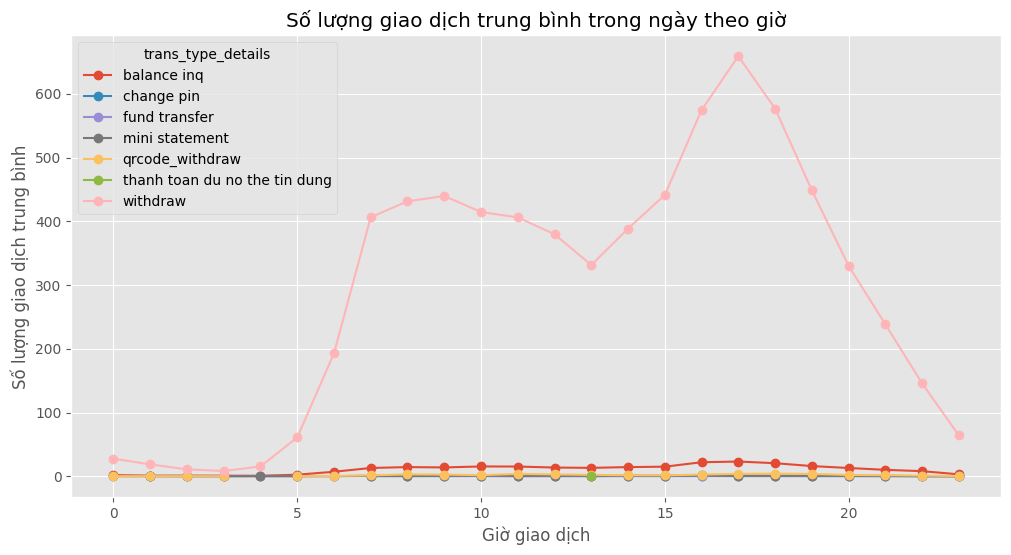

In [68]:
# Vẽ biểu đồ
df_plot3.plot(y=['balance inq', 'change pin', 'fund transfer', 'mini statement', 'qrcode_withdraw', 'thanh toan du no the tin dung', 'withdraw' ], figsize=(12, 6),marker='o')
plt.title('Số lượng giao dịch trung bình trong ngày theo giờ')
plt.ylabel('Số lượng giao dịch trung bình')
plt.xlabel('Giờ giao dịch')
 
plt.show()

In [24]:
# Trích ra 2 cột kênh và giờ
CNNTime = df.groupby(['merchant_id','hour_of_day']).size().reset_index(name='COUNTS_CNNTIME')


In [25]:
CNNTime

,merchant_id,hour_of_day,COUNTS_CNNTIME
0,A0102005,0,146
1,A0102005,1,46
2,A0102005,2,28
3,A0102005,3,21
4,A0102005,4,33
...,...,...,...
1392,A0242182,19,6
1393,A0242182,20,1
1394,A0242182,21,14
1395,A0242182,22,2


In [35]:
CNNTime.columns = CNNTime.columns.str.lower()

In [37]:
CNNTime['counts_cnntime']  = CNNTime['counts_cnntime'] / 31

In [39]:
CNNTime.describe()

,hour_of_day,counts_cnntime
count,1397.000000,1397.000000
mean,11.882606,5.255455
std,6.719660,5.372679
min,0.000000,0.032258
25%,6.000000,0.774194
50%,12.000000,3.967742
75%,18.000000,7.774194
max,23.000000,31.580645


In [44]:
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.cluster import KMeans


In [46]:
df.head(10)

,id,amnd_date,amnd_officer,auth_code,is_authorization,outward_status,posting_date,posting_status,request_category,return_code,ret_ref_number,service_class,settl_amount,settl_curr,sic_code,sic_name,source_channel,source_code,source_id,source_member_id,source_number,source_reg_num,target_channel,target_fee_amount,target_fee_curr,target_id,target_member_id,target_number,trans_amount,trans_city,trans_condition,trans_country,trans_curr,trans_date,trans_details,trans_type,merchant_id,create_date,update_date,trans_type_details,atm_source,card_source,cif,segment,company,segment_detail,branch_code,hour_of_day
0,3.219334e+09,2023-01-08,OWS_N,725600,Fin,Sent,2023-01-09,Posted,Advice,Successfully completed,300801340164,Transaction,200000.0,VND,6011,6011 ATM,Our ATM,None,413821.0,0102,A0102005,N0080171IAIB,MDS,0.0,VND,NaN,019591,519298______9514,200000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-08 21:20:19,TOA NHA COPAC,ATM,A0102005,None,2023-01-11 03:33:42.410,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,21
1,3.210562e+09,2023-01-07,OWS_N,234466,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701173385,Transaction,450000.0,VND,6011,6011 ATM,Our ATM,None,5468291.0,0102,A0102071,N0070170HKB3,VCB,0.0,None,NaN,970415,970415______2306,450000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 17:31:37,ATM DONG THANH,ATM,A0102071,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,17
2,3.209680e+09,2023-01-07,OWS_N,274137,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701152360,Transaction,1000000.0,VND,6011,6011 ATM,Our ATM,None,3274522.0,0242,A0242070,N0070170DD2J,VCB,0.0,None,NaN,970416,970416______8191,1000000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 15:48:23,TOA NHA CT1 SUDICO,ATM,A0242070,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,15
3,3.209187e+09,2023-01-07,OWS_N,000000,Fin,To be Sent,2023-01-07,Posted,Advice,Successfully completed,300701142456,Transaction,3000000.0,VND,6011,6011 ATM,Our ATM,None,3274527.0,0242,A0242071,N0070170B9RQ,VCB,0.0,None,NaN,970424,970424______0613,3000000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 14:40:39,TOA NHA CT9 SUDICO,ATM,A0242071,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,14
4,3.212528e+09,2023-01-07,OWS_N,625706,Fin,Sent,2023-01-09,Posted,Advice,Successfully completed,300701214291,Transaction,100000.0,VND,6011,6011 ATM,Our ATM,None,30134320.0,0242,A0242177,N0070170PPQS,VISA SMS,0.0,VND,NaN,484804,484804______5256,100000.0,HA NOI,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 23:13:54,V-TOWER KIM MA,ATM,A0242177,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,23
5,3.276756e+09,2023-01-14,OWS_N,000000,Fin,To be Sent,2023-01-14,Posted,Advice,Successfully completed,301401253631,Transaction,3000000.0,VND,6011,6011 ATM,Our ATM,None,6782279.0,0242,A0242128,N0140177I5I2,VCB,0.0,None,NaN,970436,970436_________9020,3000000.0,HA NOI,ATM,Viet Nam,VND,2023-01-14 05:50:30,ATM TOA NHA HH1C,ATM,A0242128,None,2023-01-17 03:28:46.990,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,5
6,3.204684e+09,2023-01-07,OWS_N,836338,Fin,To be Sent,2023-01-07,Posted,Advice,Successfully completed,300701090561,Transaction,700000.0,VND,6011,6011 ATM,Our ATM,None,7618893.0,0102,A0102086,N007016VVU2A,VCB,0.0,None,NaN,970418,970418_________7259,700000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-01-07 09:00:10,ATM COOP XA LO HA NOI,ATM,A0102086,None,2023-01-10 03:45:44.167,Withdraw,OUR ATM,NOT OUR CARD,None,None,VN0010242,UNSEGMENT,TTT,9
7,3.209887e+09,2023-01-07,OWS_N,000000,Fin,To be Sent,2023-01-09,Posted,Advice,Successfully completed,300701156980,Transaction,2900000.0,VND,6011,6011 ATM,Our ATM,None,46486550.0,0102,A0102129,N0070170EBRL,VCB,0.0,None,NaN,970436,970436_________4012,2900000.0,HO CHI MINH,ATM Chip Full Grade,Viet Nam,VND,2023-

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(df)
y_kmeans = kmeans.predict(df)

TypeError: float() argument must be a string or a real number, not 'datetime.date'